# **Лабораторная работа №3. Деревья решений. Ансамбли решающих деревьев.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from catboost import CatBoostClassifier, Pool

# 1. Анализ датасета

In [2]:
df_red = pd.read_csv("winequality-red.csv", sep=';')

In [3]:
df_red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [4]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Пропущенных значений нет

In [5]:
df_white = pd.read_csv("winequality-white.csv", sep=';')

In [6]:
df_white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

Возьму датасет с белыми винами, так как там больше наблюдений, но можно и объедиить их, добавив признак по цвету

In [7]:
X = df_white.drop('quality', axis=1)
y = df_white['quality']

<Axes: xlabel='quality', ylabel='Count'>

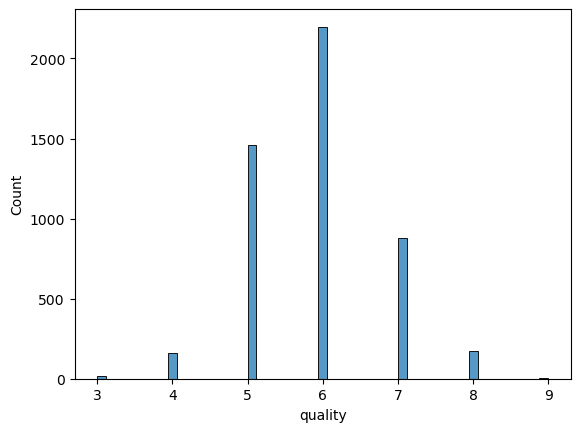

In [8]:
sns.histplot(y)

In [9]:
X

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
4893     11.2  
4894      9.6  
4895      9.4  
4896     12.8  
4897     11.8  

[4898 rows x 11 columns]

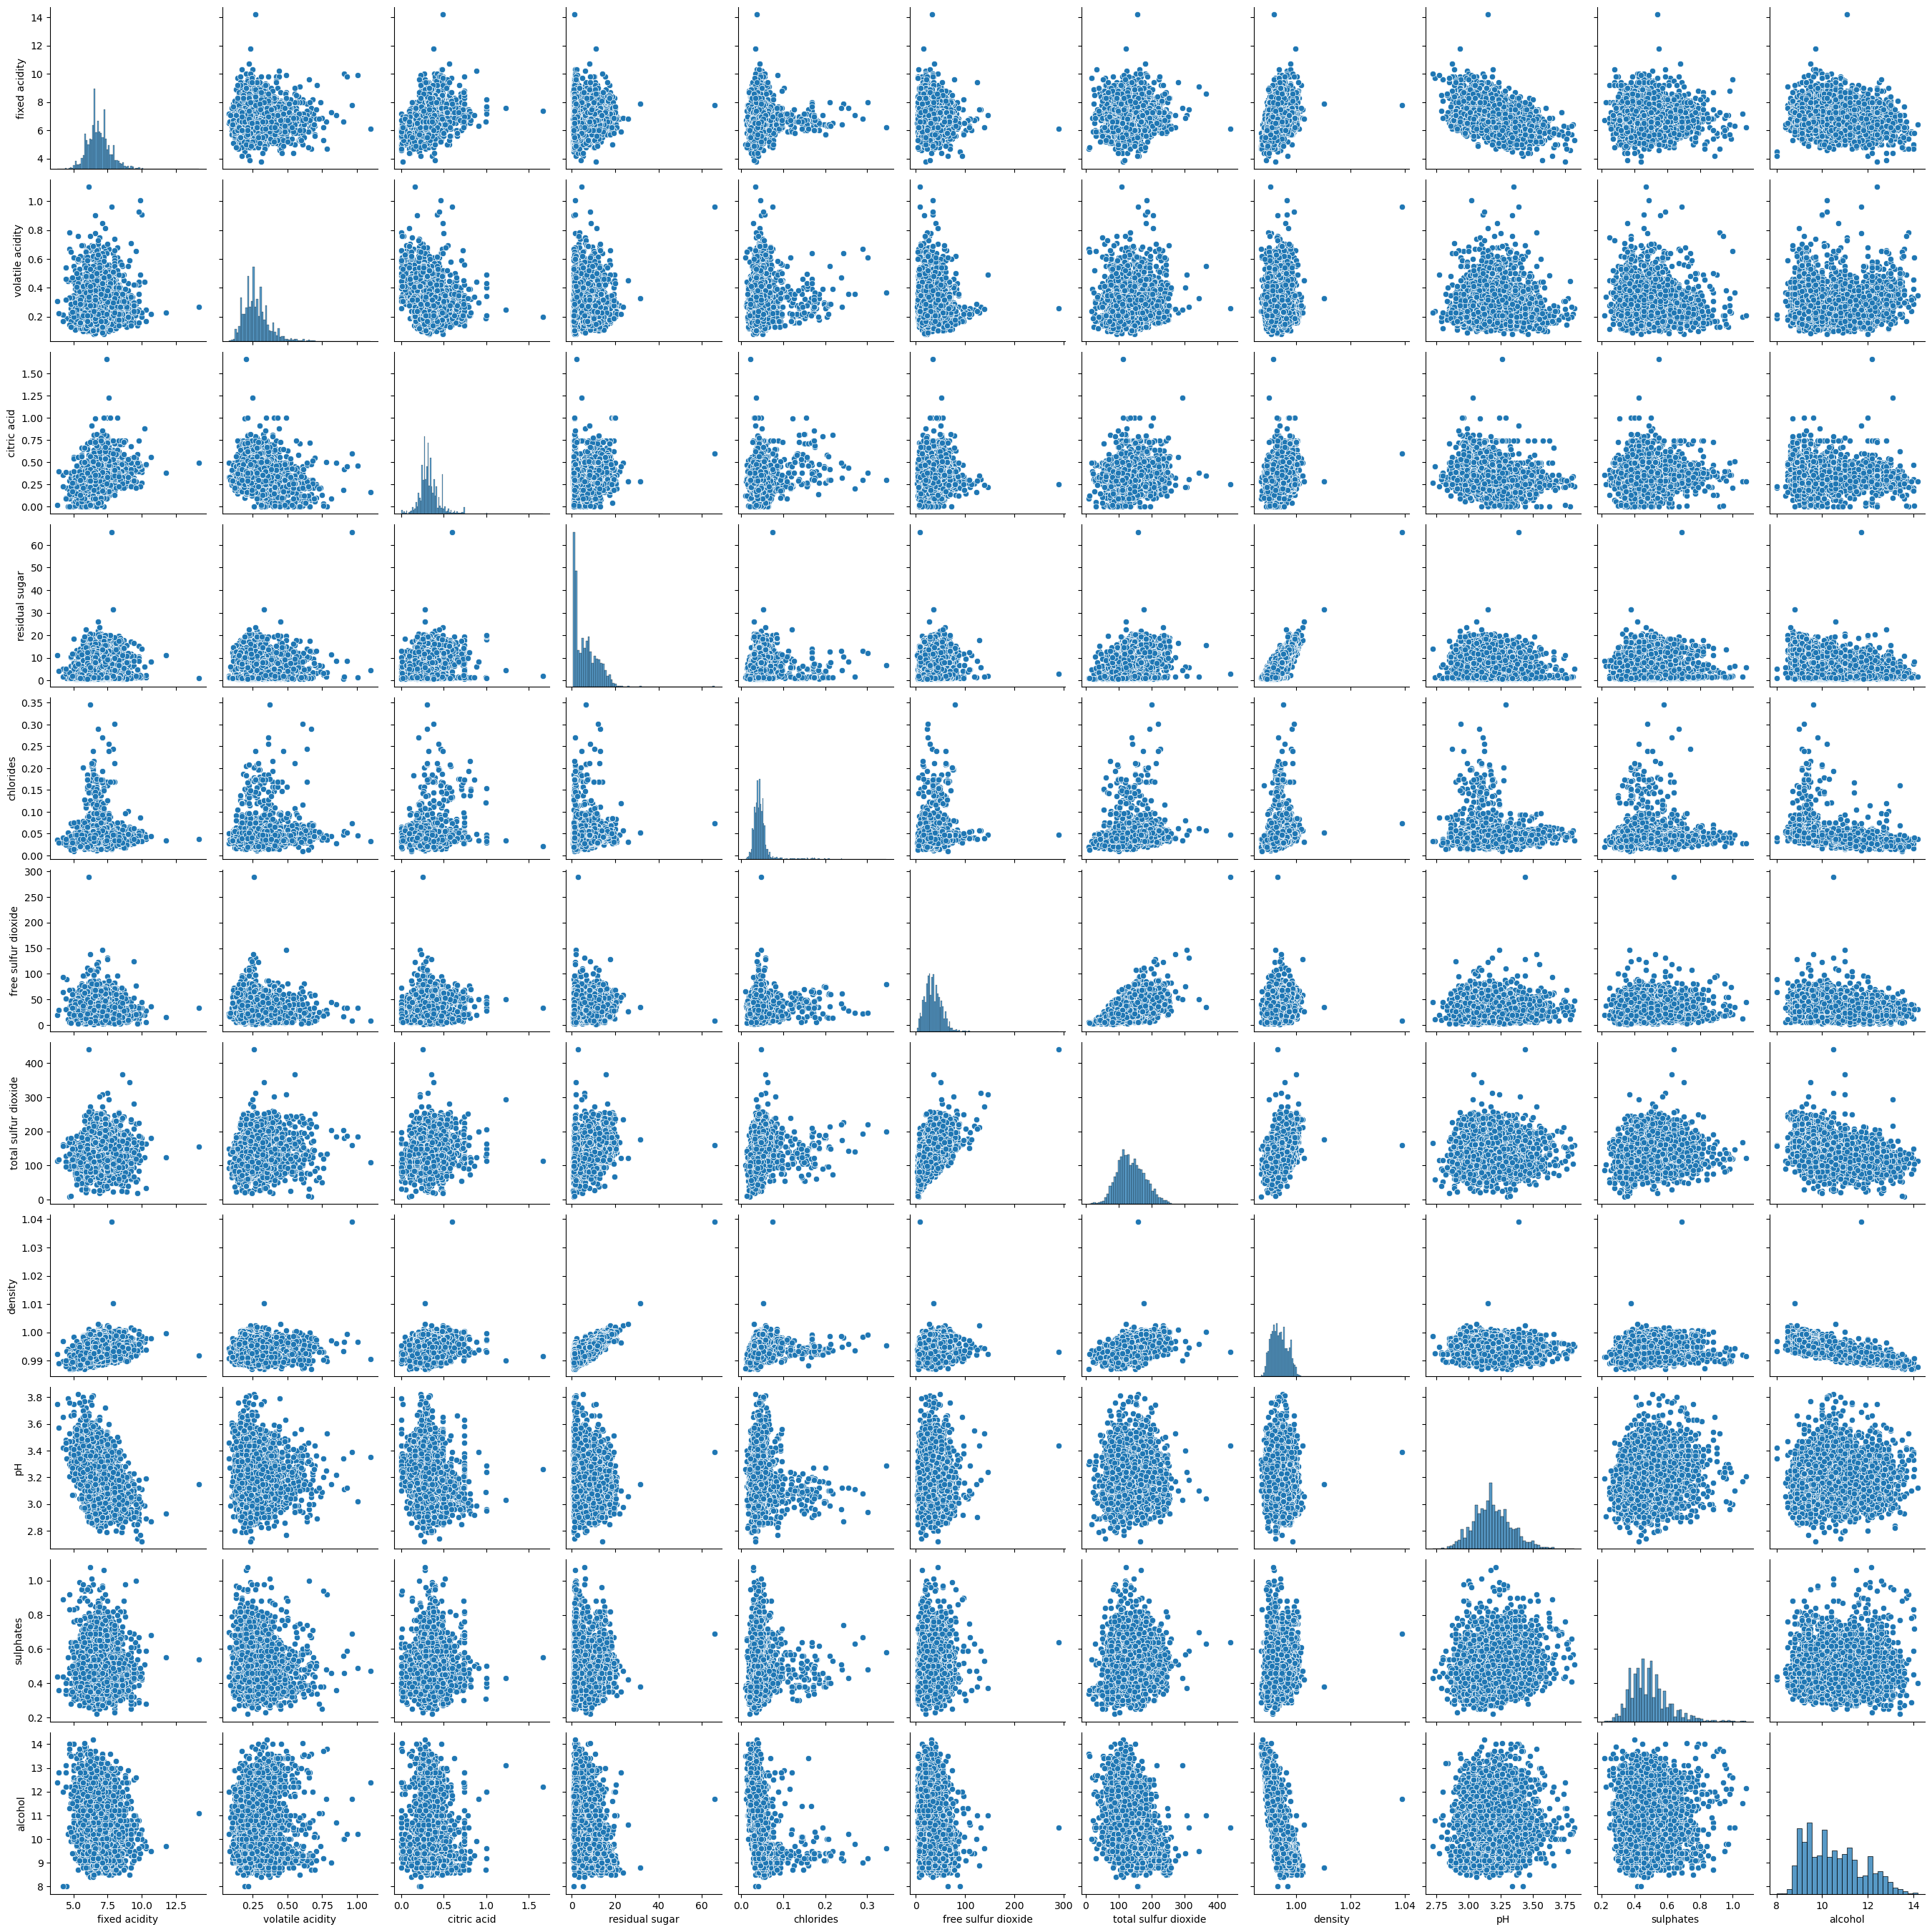

In [10]:
sns.pairplot(X)

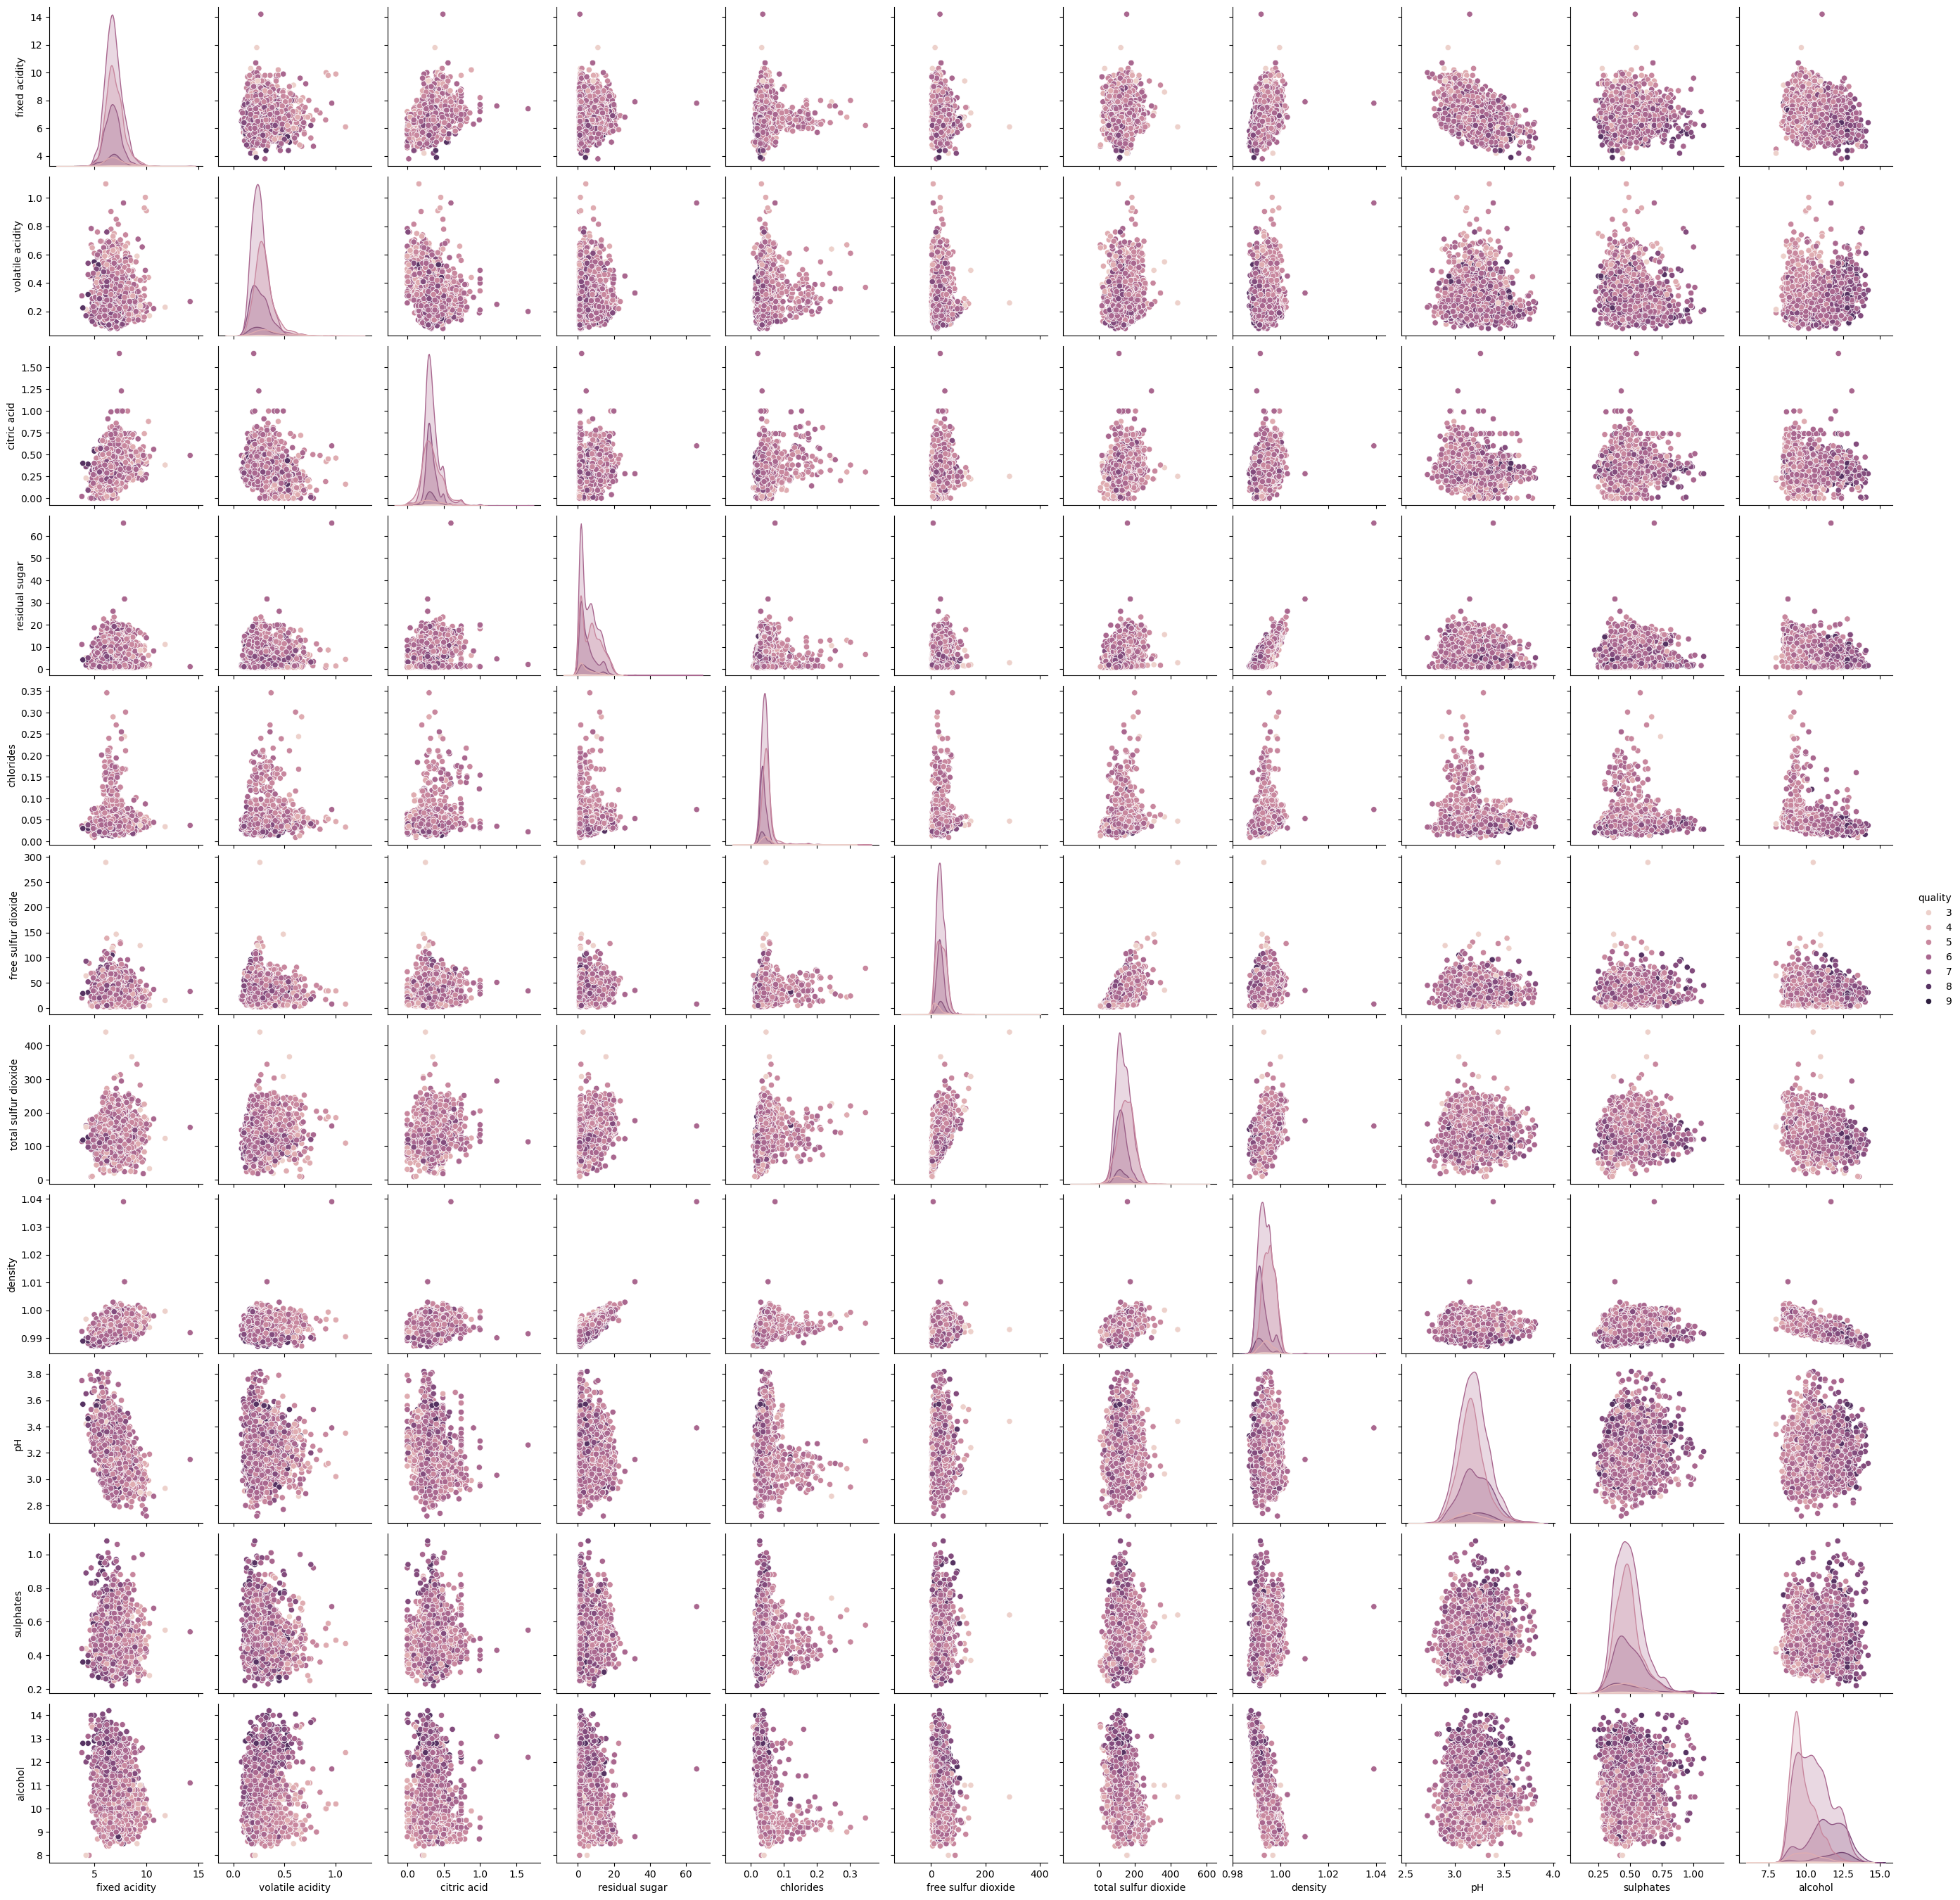

In [11]:
sns.pairplot(df_white, hue='quality')

In [12]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

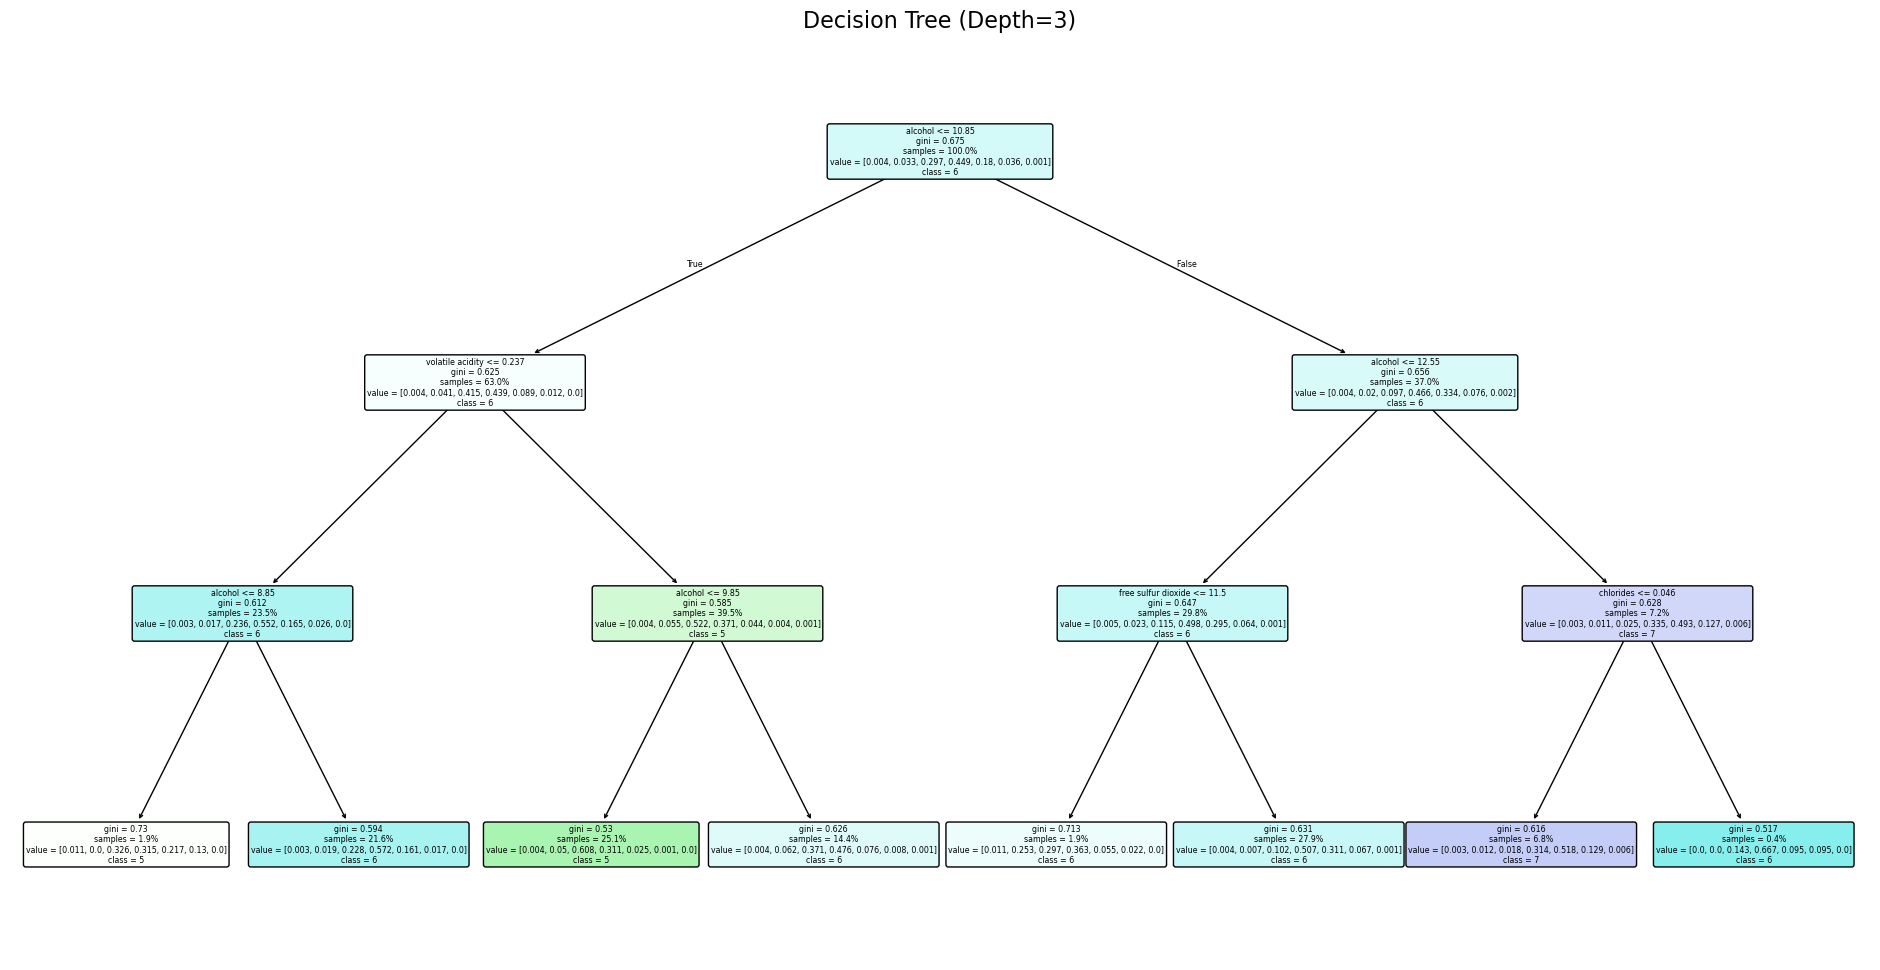

In [13]:
plt.figure(figsize=(24, 12))

# Строим дерево
plot_tree(clf, 
          filled=True, 
          feature_names=X.columns,  # Ваши названия признаков
          class_names=[str(x) for x in sorted(y.unique())], 
          rounded=True,
          proportion=True
          #fontsize=12
        )

plt.title("Decision Tree (Depth=3)", fontsize=16)
plt.show()

Оценим качество дерева решений глубины 3.

In [14]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.5373621886484279

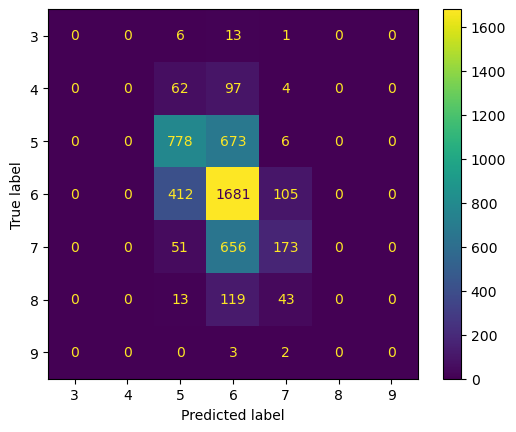

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix(y, y_pred, labels=clf.classes_), display_labels=clf.classes_)
disp.plot()

In [16]:
balanced_accuracy_score(y, y_pred)

0.21362157104962068

In [17]:
print(classification_report(y, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00       163
           5       0.59      0.53      0.56      1457
           6       0.52      0.76      0.62      2198
           7       0.52      0.20      0.29       880
           8       0.00      0.00      0.00       175
           9       0.00      0.00      0.00         5

    accuracy                           0.54      4898
   macro avg       0.23      0.21      0.21      4898
weighted avg       0.50      0.54      0.50      4898



c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\smolk\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


**Вывод:** В датасете отстувтвуют пропущенные значения. Все переменные являются вещественными. Таргет распределён нормально  со средним значением качества вина - 6. Можно заметить, что из этого следует несбалансированность классов, на что стоит обратить внимание при оценке моделей. Признаки так же имеют схожее на нормальное распределение внутри классов (оценки качества вина).
Дерево решений с параметрами по умолчанию глубины 3 даёт весьма сомнительный результат, особенно плохо предсказание работает на классах, которые встречаются редко.

# 2. Построить зависимость качества решения (на обучении и скользящем контроле) от числа листьев дерева. Рассмотреть разные критерии ветвления

In [18]:
# Кросс-валидация
cv_folds = 3
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=52)

In [19]:
def evaluate_trees_by_leaves(X, y, max_leaves_range, cv, criteria=['gini', 'entropy', 'log_loss']):
    """
    Оценивает качество деревьев решений с разными критериями ветвления и ограничением числа листьев
    используя кросс-валидацию
    
    Args:
        X, y: признаки и метки
        max_leaves_range: диапазон максимального числа листьев для экспериментов
        cv: объект кросс-валидации
        criteria: список критериев ветвления для тестирования
    
    Returns:
        dict: результаты экспериментов для каждого критерия
    """
    results = {}
    
    for criterion in criteria:
        print(f"Тестируем критерий: {criterion}")
        cv_accuracy_scores = []
        cv_balanced_scores = []
        cv_f1_scores = []
        train_accuracy_scores = []
        train_balanced_scores = []
        train_f1_scores = []
        
        for max_leaves in max_leaves_range:
            # Создаем дерево с ограничением по количеству листьев
            clf = DecisionTreeClassifier(
                criterion=criterion,
                max_leaf_nodes=max_leaves,
                random_state=52
            )
            
            # Кросс-валидация
            cv_acc_scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')
            cv_bal_scores = cross_val_score(clf, X, y, cv=cv, scoring='balanced_accuracy')
            cv_f1_scores_list = cross_val_score(clf, X, y, cv=cv, scoring='f1_weighted')
            
            # Обучаем на полном датасете для оценки качества на обучении
            clf.fit(X, y)
            y_train_pred = clf.predict(X)
            train_acc = accuracy_score(y, y_train_pred)
            train_balanced_acc = balanced_accuracy_score(y, y_train_pred)
            train_f1 = f1_score(y, y_train_pred, average='weighted')
            
            # Сохраняем средние значения по фолдам
            cv_accuracy_scores.append(np.mean(cv_acc_scores))
            cv_balanced_scores.append(np.mean(cv_bal_scores))
            cv_f1_scores.append(np.mean(cv_f1_scores_list))
            train_accuracy_scores.append(train_acc)
            train_balanced_scores.append(train_balanced_acc)
            train_f1_scores.append(train_f1)
            
            print(f"  Листьев: {max_leaves}, CV Acc: {np.mean(cv_acc_scores):.3f}±{np.std(cv_acc_scores):.3f}, Train Acc: {train_acc:.3f}")
        
        results[criterion] = {
            'max_leaves': max_leaves_range,
            'cv_accuracy': cv_accuracy_scores,
            'cv_balanced_accuracy': cv_balanced_scores,
            'cv_f1': cv_f1_scores,
            'train_accuracy': train_accuracy_scores,
            'train_balanced_accuracy': train_balanced_scores,
            'train_f1': train_f1_scores
        }
    
    return results

In [20]:
# Использую stratify для сохранения пропорций классов в train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

In [21]:
# Определяем диапазон числа листьев для экспериментов
max_leaves_range = [2**i for i in range(1, 12)]

# Проводим эксперименты с кросс-валидацией
results = evaluate_trees_by_leaves(X_train, y_train, max_leaves_range, cv)


Тестируем критерий: gini
  Листьев: 2, CV Acc: 0.449±0.001, Train Acc: 0.449
  Листьев: 4, CV Acc: 0.508±0.007, Train Acc: 0.521
  Листьев: 8, CV Acc: 0.511±0.009, Train Acc: 0.532
  Листьев: 16, CV Acc: 0.519±0.006, Train Acc: 0.553
  Листьев: 32, CV Acc: 0.522±0.007, Train Acc: 0.567
  Листьев: 64, CV Acc: 0.526±0.011, Train Acc: 0.613
  Листьев: 128, CV Acc: 0.531±0.019, Train Acc: 0.676
  Листьев: 256, CV Acc: 0.527±0.010, Train Acc: 0.771
  Листьев: 512, CV Acc: 0.535±0.014, Train Acc: 0.890
  Листьев: 1024, CV Acc: 0.537±0.009, Train Acc: 1.000
  Листьев: 2048, CV Acc: 0.537±0.009, Train Acc: 1.000
Тестируем критерий: entropy
  Листьев: 2, CV Acc: 0.449±0.001, Train Acc: 0.449
  Листьев: 4, CV Acc: 0.508±0.008, Train Acc: 0.514
  Листьев: 8, CV Acc: 0.510±0.002, Train Acc: 0.521
  Листьев: 16, CV Acc: 0.512±0.008, Train Acc: 0.542
  Листьев: 32, CV Acc: 0.518±0.004, Train Acc: 0.567
  Листьев: 64, CV Acc: 0.524±0.011, Train Acc: 0.592
  Листьев: 128, CV Acc: 0.514±0.020, Train Ac

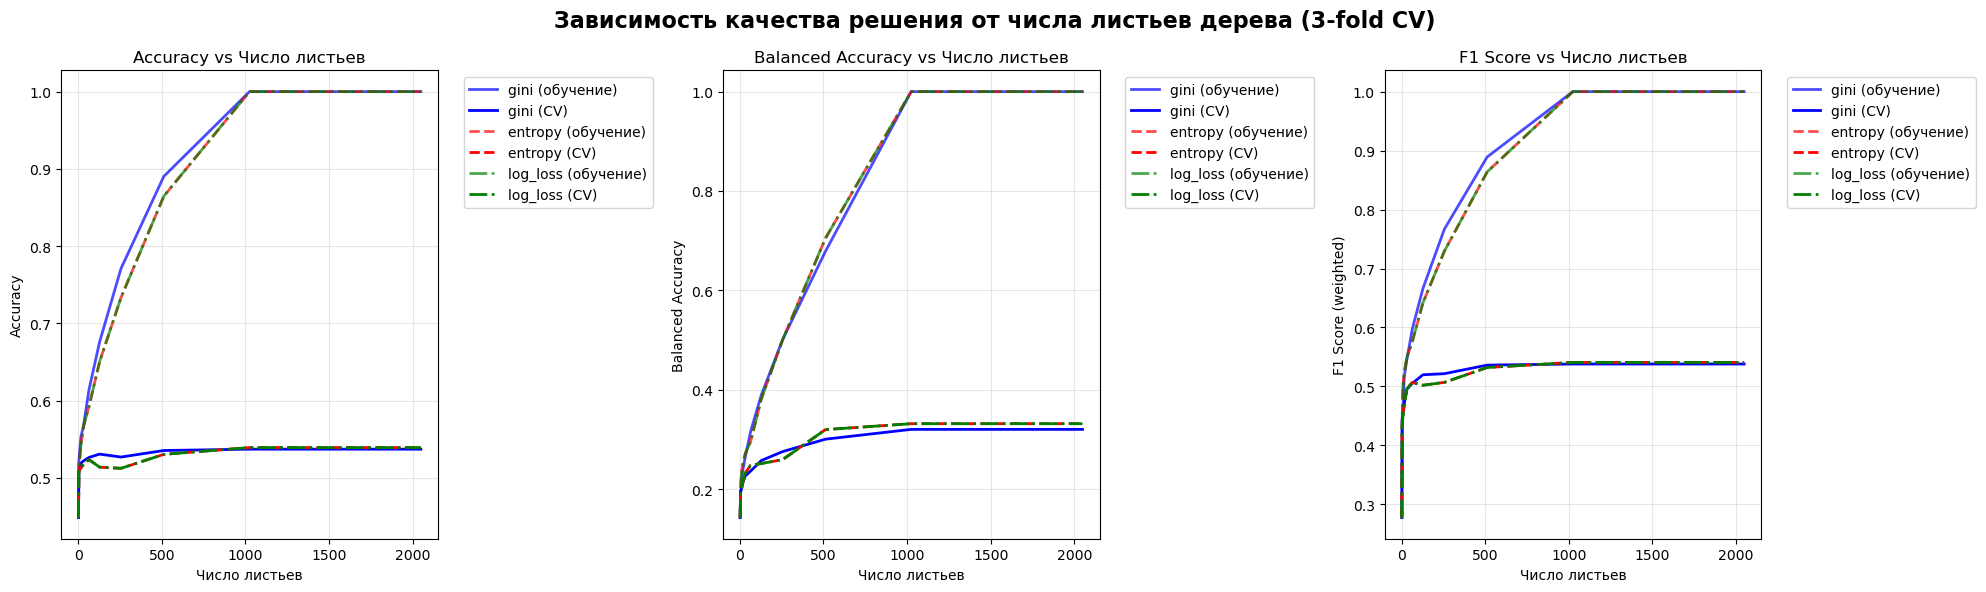

In [22]:
def plot_results(results, max_leaves_range):
    """
    Строит графики зависимости качества от числа листьев для всех критериев
    с использованием кросс-валидации
    """
    # Создаем фигуру с 3 подграфиками в один ряд
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle('Зависимость качества решения от числа листьев дерева (3-fold CV)', fontsize=16, fontweight='bold')
    
    # Цвета для разных критериев
    colors = {'gini': 'blue', 'entropy': 'red', 'log_loss': 'green'}
    linestyles = {'gini': '-', 'entropy': '--', 'log_loss': '-.'}
    
    # График 1: Accuracy
    ax1 = axes[0]
    for criterion, color in colors.items():
        ax1.plot(max_leaves_range, results[criterion]['train_accuracy'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (обучение)', alpha=0.7, linewidth=2)
        ax1.plot(max_leaves_range, results[criterion]['cv_accuracy'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (CV)', alpha=1.0, linewidth=2)
    
    ax1.set_xlabel('Число листьев')
    ax1.set_ylabel('Accuracy')
    ax1.set_title('Accuracy vs Число листьев')
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    #ax1.set_xscale('log')
    
    # График 2: Balanced Accuracy
    ax2 = axes[1]
    for criterion, color in colors.items():
        ax2.plot(max_leaves_range, results[criterion]['train_balanced_accuracy'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (обучение)', alpha=0.7, linewidth=2)
        ax2.plot(max_leaves_range, results[criterion]['cv_balanced_accuracy'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (CV)', alpha=1.0, linewidth=2)
    
    ax2.set_xlabel('Число листьев')
    ax2.set_ylabel('Balanced Accuracy')
    ax2.set_title('Balanced Accuracy vs Число листьев')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.grid(True, alpha=0.3)
    #ax2.set_xscale('log')
    
    # График 3: F1 Score
    ax3 = axes[2]
    for criterion, color in colors.items():
        ax3.plot(max_leaves_range, results[criterion]['train_f1'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (обучение)', alpha=0.7, linewidth=2)
        ax3.plot(max_leaves_range, results[criterion]['cv_f1'], 
                color=color, linestyle=linestyles[criterion], 
                label=f'{criterion} (CV)', alpha=1.0, linewidth=2)
    
    ax3.set_xlabel('Число листьев')
    ax3.set_ylabel('F1 Score (weighted)')
    ax3.set_title('F1 Score vs Число листьев')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, alpha=0.3)
    #ax3.set_xscale('log')
    
    plt.tight_layout()
    plt.show()

# Строим графики
plot_results(results, max_leaves_range)


In [23]:
# оценим качество модели на test с 512 листьями и критерием ветвления entropy

clf = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 512, random_state = 52)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"balanced_accuracy: {balanced_accuracy_score(y_test, y_pred)}")

accuracy: 0.5775510204081633
balanced_accuracy: 0.3151195903900574


**Вывод**: Для всех критериев метрики качества решения на кросс-валидации перестают расти после 500 листьев, то есть при >500 листьев начинается переобучение. Также из графиков видно, что критерии ветвления entropy и log-loss дают чуть большую точноть, чем критерий gini. В результате, на тесте получаем балансированную точность выше, чем на дереве глубины 3 (даже с учетом того, что для дерева глубины 3 обучались на всём датасете), но всё ещё весьма низкую.

# 3. Применить модель градиентного бустинга. Вычислить и визуализировать значимость признаков. Визуализировать первые 3 дерева бустинга

In [24]:
model = CatBoostClassifier(
    iterations=2000,
    max_depth = 3,
    learning_rate=0.2,
    random_seed=52,
    verbose=100
)

train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

In [25]:
# Обучение с отслеживанием метрик на train и validation
model.fit(
    train_pool,
    eval_set=test_pool,  # Валидационная выборка
    verbose=100, 
    plot=True
)
y_pred = model.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.6531133	test: 1.6504221	best: 1.6504221 (0)	total: 148ms	remaining: 4m 56s
100:	learn: 0.9303257	test: 1.0164698	best: 1.0164698 (100)	total: 314ms	remaining: 5.89s
200:	learn: 0.8388889	test: 0.9904971	best: 0.9903967 (199)	total: 472ms	remaining: 4.22s
300:	learn: 0.7757186	test: 0.9802342	best: 0.9793509 (272)	total: 629ms	remaining: 3.55s
400:	learn: 0.7195350	test: 0.9669269	best: 0.9667668 (393)	total: 802ms	remaining: 3.2s
500:	learn: 0.6697756	test: 0.9636515	best: 0.9636515 (500)	total: 984ms	remaining: 2.94s
600:	learn: 0.6276580	test: 0.9557054	best: 0.9544897 (592)	total: 1.15s	remaining: 2.67s
700:	learn: 0.5897400	test: 0.9536400	best: 0.9527842 (689)	total: 1.31s	remaining: 2.42s
800:	learn: 0.5542741	test: 0.9496742	best: 0.9495336 (796)	total: 1.47s	remaining: 2.19s
900:	learn: 0.5244580	test: 0.9506447	best: 0.9494349 (801)	total: 1.64s	remaining: 2s
1000:	learn: 0.4946676	test: 0.9496398	best: 0.9494349 (801)	total: 1.8s	remaining: 1.79s
1100:	learn: 0.46

In [26]:
accuracy_score(y_test, y_pred)

0.6238095238095238

In [27]:
balanced_accuracy_score(y_test, y_pred)

0.34380352400464936

In [28]:
# Получаем важность признаков
feature_importance = model.get_feature_importance()
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=True)

print("Важность признаков:")
print(importance_df)


Важность признаков:
                 feature  importance
4              chlorides    7.454333
0          fixed acidity    7.503051
3         residual sugar    7.808811
9              sulphates    7.997626
6   total sulfur dioxide    8.192950
8                     pH    8.247642
2            citric acid    8.503844
7                density    9.862550
1       volatile acidity   10.057410
5    free sulfur dioxide   10.970960
10               alcohol   13.400823


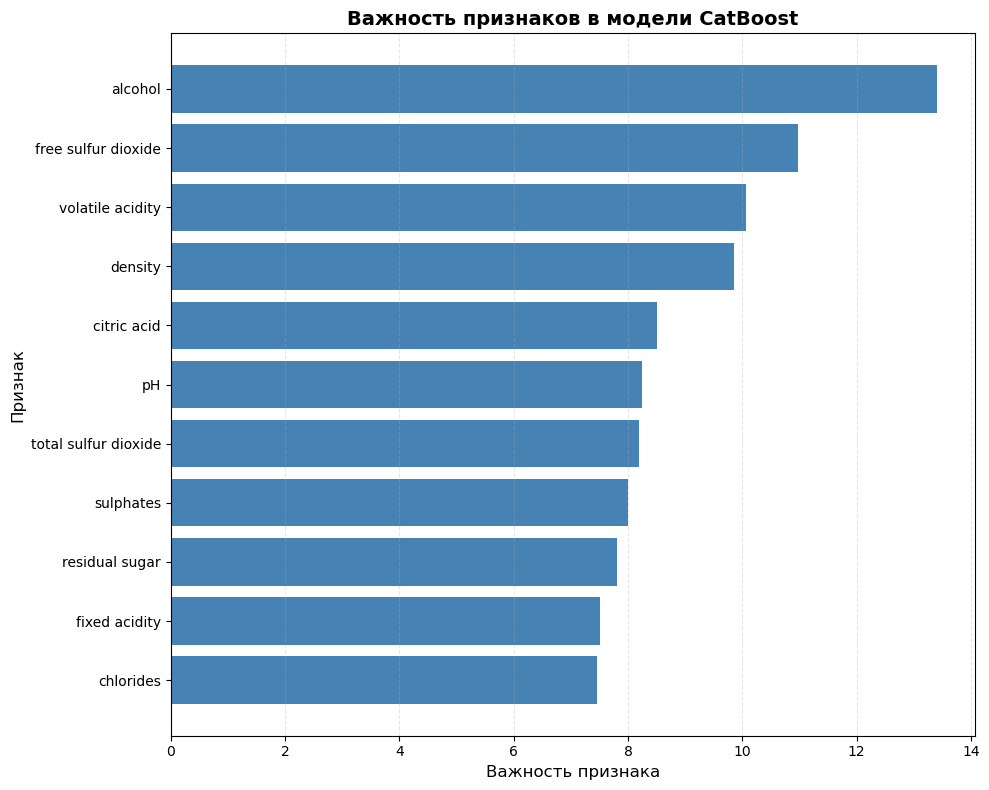

In [29]:
# Визуализация важности признаков
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], color='steelblue')
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в модели CatBoost', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


Визуализируем первые 3 дерева бустинга

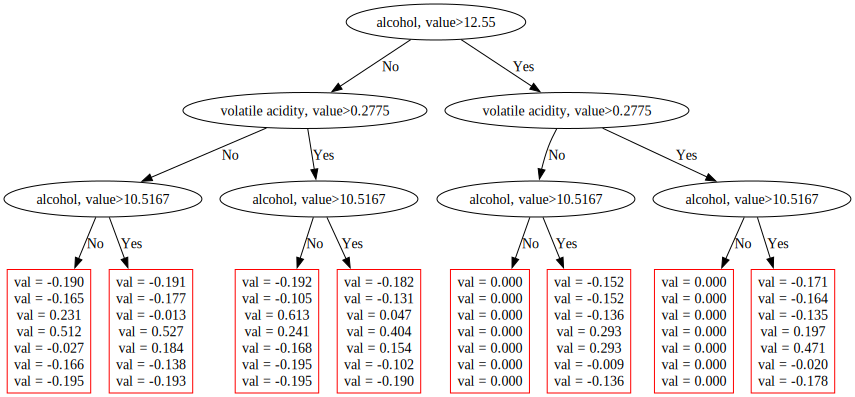

In [37]:
model.plot_tree(tree_idx=0, pool=train_pool)

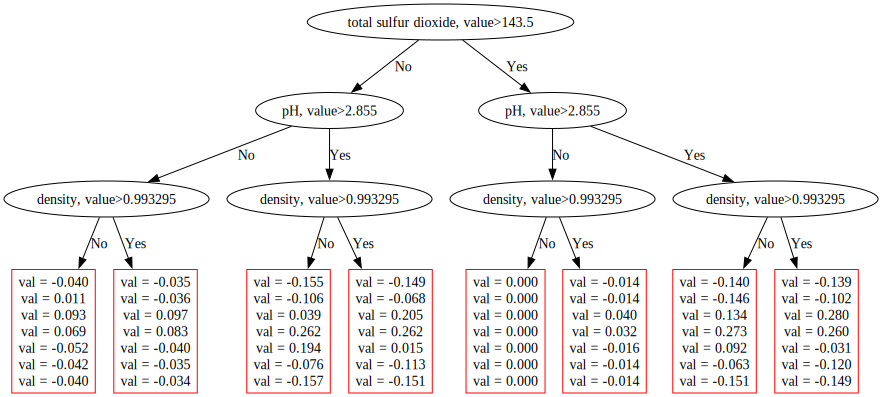

In [40]:
model.plot_tree(tree_idx=1, pool=train_pool)

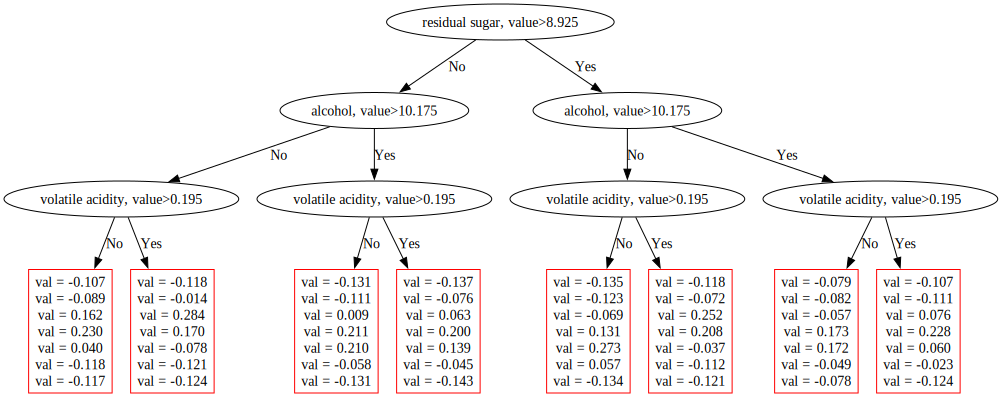

In [41]:
model.plot_tree(tree_idx=2, pool=train_pool)

**Вывод:** Признак Alcohol самый значимый, однако нет признаков, выделяющихся сильно меньшей значимостью. Точность уже лучше, чем на дереве решений, но лучше будет видно далее с применением кросс-валидацией. Также видно, что первое же дерево сначала делит наблюдения по признаку alcohol, что тоже подтверждает его значимость.

# 4. Для метода градиентного бустинга построить зависимость качества решения (на обучении и скользящем контроле) от числа деревьев.

In [42]:
def evaluate_catboost_by_trees(X_train, y_train, n_trees_range, cv, 
                                 learning_rate=0.2, random_seed=52):
    """
    Оценивает качество CatBoost с разным количеством деревьев
    используя кросс-валидацию
    
    Args:
        X_train, y_train: признаки и метки обучающей выборки
        n_trees_range: диапазон количества деревьев (iterations) для экспериментов
        cv: объект кросс-валидации
        learning_rate: скорость обучения
        random_seed: seed для воспроизводимости
    
    Returns:
        dict: результаты экспериментов
    """
    cv_accuracy_scores = []
    cv_balanced_scores = []
    cv_f1_scores = []
    train_accuracy_scores = []
    train_balanced_scores = []
    train_f1_scores = []
    
    for n_trees in n_trees_range:
        print(f"Тестируем количество деревьев: {n_trees}")
        
        # Создаем модель CatBoost с заданным количеством деревьев
        model = CatBoostClassifier(
            iterations=n_trees,
            learning_rate=learning_rate,
            random_seed=random_seed,
            verbose=False  # Отключаем вывод для кросс-валидации
        )
        
        # Кросс-валидация
        cv_acc_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_bal_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='balanced_accuracy')
        cv_f1_scores_list = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
        
        # Обучаем на полном обучающем датасете для оценки качества на обучении
        model.fit(X_train, y_train, verbose=False)
        y_train_pred = model.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        
        # Сохраняем средние значения по фолдам
        cv_accuracy_scores.append(np.mean(cv_acc_scores))
        cv_balanced_scores.append(np.mean(cv_bal_scores))
        cv_f1_scores.append(np.mean(cv_f1_scores_list))
        train_accuracy_scores.append(train_acc)
        train_balanced_scores.append(train_balanced_acc)
        train_f1_scores.append(train_f1)
        
        print(f"  CV Acc: {np.mean(cv_acc_scores):.4f}±{np.std(cv_acc_scores):.4f}, Train Acc: {train_acc:.4f}")
        print(f"  CV Balanced Acc: {np.mean(cv_bal_scores):.4f}±{np.std(cv_bal_scores):.4f}, Train Balanced Acc: {train_balanced_acc:.4f}")
        print(f"  CV F1: {np.mean(cv_f1_scores_list):.4f}±{np.std(cv_f1_scores_list):.4f}, Train F1: {train_f1:.4f}\n")
    
    results = {
        'n_trees': n_trees_range,
        'cv_accuracy': cv_accuracy_scores,
        'cv_balanced_accuracy': cv_balanced_scores,
        'cv_f1': cv_f1_scores,
        'train_accuracy': train_accuracy_scores,
        'train_balanced_accuracy': train_balanced_scores,
        'train_f1': train_f1_scores
    }
    
    return results


In [43]:
# Определяем диапазон количества деревьев для экспериментов
# Используем разные диапазоны для более детального анализа
n_trees_range = [10, 25, 50, 100, 150, 200, 300, 400, 500, 750, 1000]

# Проводим эксперименты с кросс-валидацией
catboost_results = evaluate_catboost_by_trees(X_train, y_train, n_trees_range, cv)


Тестируем количество деревьев: 10
  CV Acc: 0.5397±0.0120, Train Acc: 0.5694
  CV Balanced Acc: 0.2154±0.0065, Train Balanced Acc: 0.2322
  CV F1: 0.4986±0.0139, Train F1: 0.5325

Тестируем количество деревьев: 25
  CV Acc: 0.5505±0.0121, Train Acc: 0.5957
  CV Balanced Acc: 0.2264±0.0065, Train Balanced Acc: 0.2601
  CV F1: 0.5165±0.0131, Train F1: 0.5648

Тестируем количество деревьев: 50
  CV Acc: 0.5703±0.0121, Train Acc: 0.6575
  CV Balanced Acc: 0.2503±0.0091, Train Balanced Acc: 0.3229
  CV F1: 0.5433±0.0139, Train F1: 0.6382

Тестируем количество деревьев: 100
  CV Acc: 0.5779±0.0173, Train Acc: 0.7427
  CV Balanced Acc: 0.2690±0.0072, Train Balanced Acc: 0.4635
  CV F1: 0.5580±0.0179, Train F1: 0.7333

Тестируем количество деревьев: 150
  CV Acc: 0.5875±0.0196, Train Acc: 0.8139
  CV Balanced Acc: 0.2851±0.0165, Train Balanced Acc: 0.6413
  CV F1: 0.5707±0.0209, Train F1: 0.8111

Тестируем количество деревьев: 200
  CV Acc: 0.5942±0.0114, Train Acc: 0.8684
  CV Balanced Acc: 0

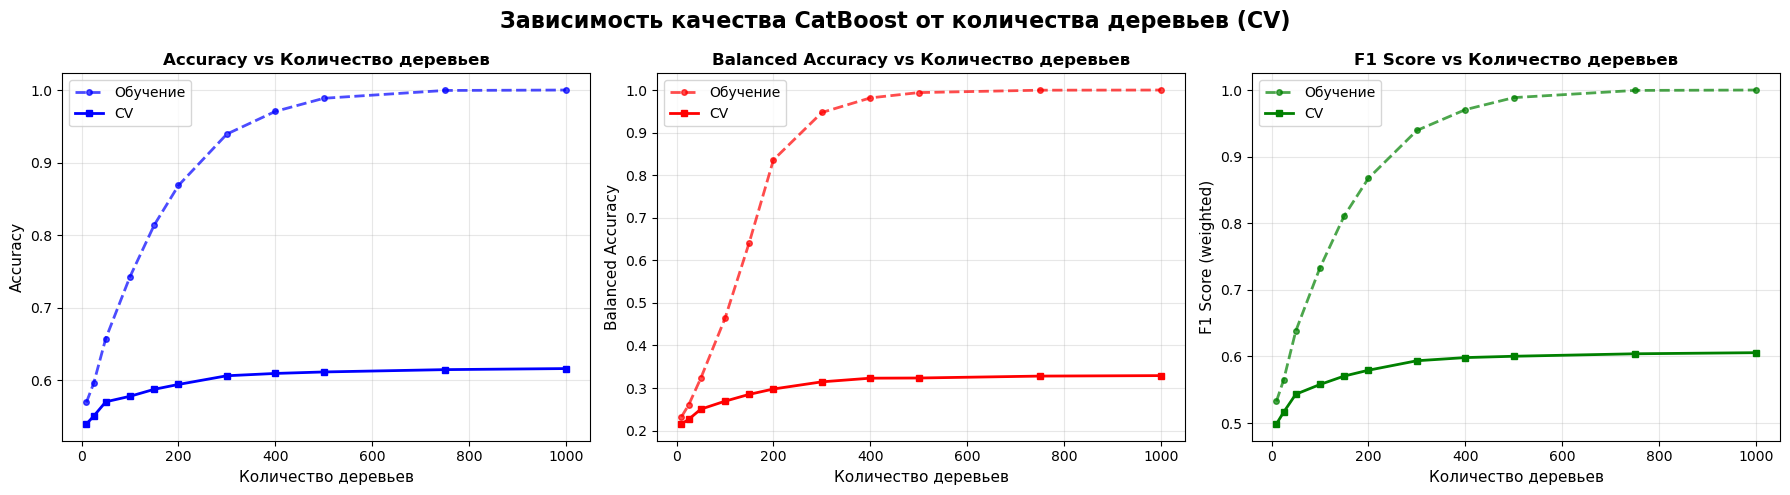

In [44]:
def plot_catboost_results(results, n_trees_range):
    """
    Строит графики зависимости качества от количества деревьев в CatBoost
    с использованием кросс-валидации
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Зависимость качества CatBoost от количества деревьев (CV)', 
                 fontsize=16, fontweight='bold')
    
    # График 1: Accuracy
    ax1 = axes[0]
    ax1.plot(n_trees_range, results['train_accuracy'], 
            color='blue', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax1.plot(n_trees_range, results['cv_accuracy'], 
            color='blue', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax1.set_xlabel('Количество деревьев', fontsize=11)
    ax1.set_ylabel('Accuracy', fontsize=11)
    ax1.set_title('Accuracy vs Количество деревьев', fontsize=12, fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # График 2: Balanced Accuracy
    ax2 = axes[1]
    ax2.plot(n_trees_range, results['train_balanced_accuracy'], 
            color='red', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax2.plot(n_trees_range, results['cv_balanced_accuracy'], 
            color='red', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax2.set_xlabel('Количество деревьев', fontsize=11)
    ax2.set_ylabel('Balanced Accuracy', fontsize=11)
    ax2.set_title('Balanced Accuracy vs Количество деревьев', fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    # График 3: F1 Score
    ax3 = axes[2]
    ax3.plot(n_trees_range, results['train_f1'], 
            color='green', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax3.plot(n_trees_range, results['cv_f1'], 
            color='green', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax3.set_xlabel('Количество деревьев', fontsize=11)
    ax3.set_ylabel('F1 Score (weighted)', fontsize=11)
    ax3.set_title('F1 Score vs Количество деревьев', fontsize=12, fontweight='bold')
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


# Строим графики
plot_catboost_results(catboost_results, n_trees_range)


In [45]:
# обучим модель на 400 деревьях и оценим на test

model = CatBoostClassifier(
    iterations=400,
    learning_rate=0.2,
    random_seed=52,
    verbose=False
)

model.fit(
    train_pool,
)

y_pred = model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"balanced_accuracy: {balanced_accuracy_score(y_test, y_pred)}")

accuracy: 0.6639455782312925
balanced_accuracy: 0.37538001818962335


In [46]:
# обучим модель на 1160 деревьях и оценим на test

model = CatBoostClassifier(
    iterations=1160,
    max_depth = 3,
    learning_rate=0.2,
    random_seed=52,
    verbose=False
)

model.fit(
    train_pool,
)

y_pred = model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"balanced_accuracy: {balanced_accuracy_score(y_test, y_pred)}")

accuracy: 0.6224489795918368
balanced_accuracy: 0.34326016957113475


**Вывод:** Все метрики качества практически не изменяются после 400 итерации, так что оставим 400 деревьев. В конечном счёте точность значительно выше, чем у дерева решений.

# 5. Выполнить пункт 3-4 для модели случайного леса. 

In [47]:
# Пункт 3 для Random Forest: Применить модель случайного леса, 
# вычислить и визуализировать значимость признаков, визуализировать первые 3 дерева

# Инициализируем Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=52,
    n_jobs=-1  # Используем все доступные ядра
)

# Обучаем модель
rf_model.fit(X_train, y_train)

# Оценка качества
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy на тесте: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Balanced Accuracy на тесте: {balanced_accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score на тесте: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")


Accuracy на тесте: 0.6966
Balanced Accuracy на тесте: 0.3805
F1 Score на тесте: 0.6852


In [48]:
# Получаем важность признаков для Random Forest
rf_feature_importance = rf_model.feature_importances_
rf_feature_names = X_train.columns

# Создаем DataFrame для удобства
rf_importance_df = pd.DataFrame({
    'feature': rf_feature_names,
    'importance': rf_feature_importance
}).sort_values('importance', ascending=True)

print("Важность признаков в Random Forest:")
print(rf_importance_df)


Важность признаков в Random Forest:
                 feature  importance
0          fixed acidity    0.075895
9              sulphates    0.079766
2            citric acid    0.080270
4              chlorides    0.082347
8                     pH    0.088409
3         residual sugar    0.088951
6   total sulfur dioxide    0.091717
5    free sulfur dioxide    0.093624
1       volatile acidity    0.100358
7                density    0.106582
10               alcohol    0.112081


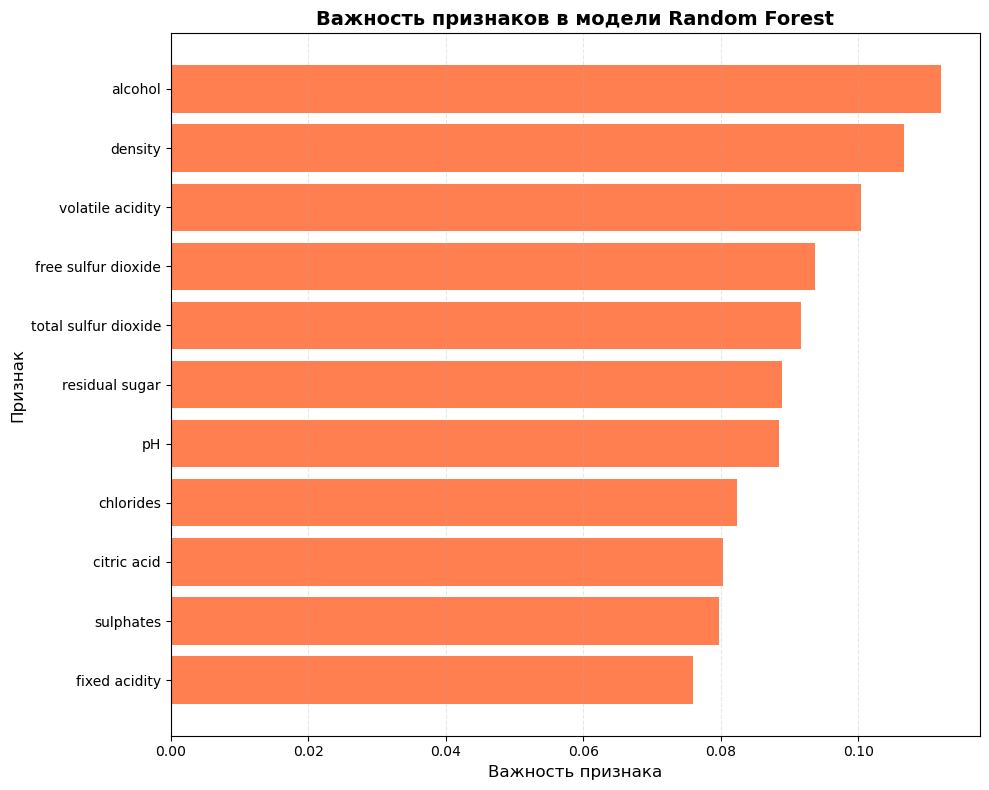

In [49]:
# Визуализация важности признаков Random Forest
plt.figure(figsize=(10, 8))
plt.barh(rf_importance_df['feature'], rf_importance_df['importance'], color='coral')
plt.xlabel('Важность признака', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в модели Random Forest', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


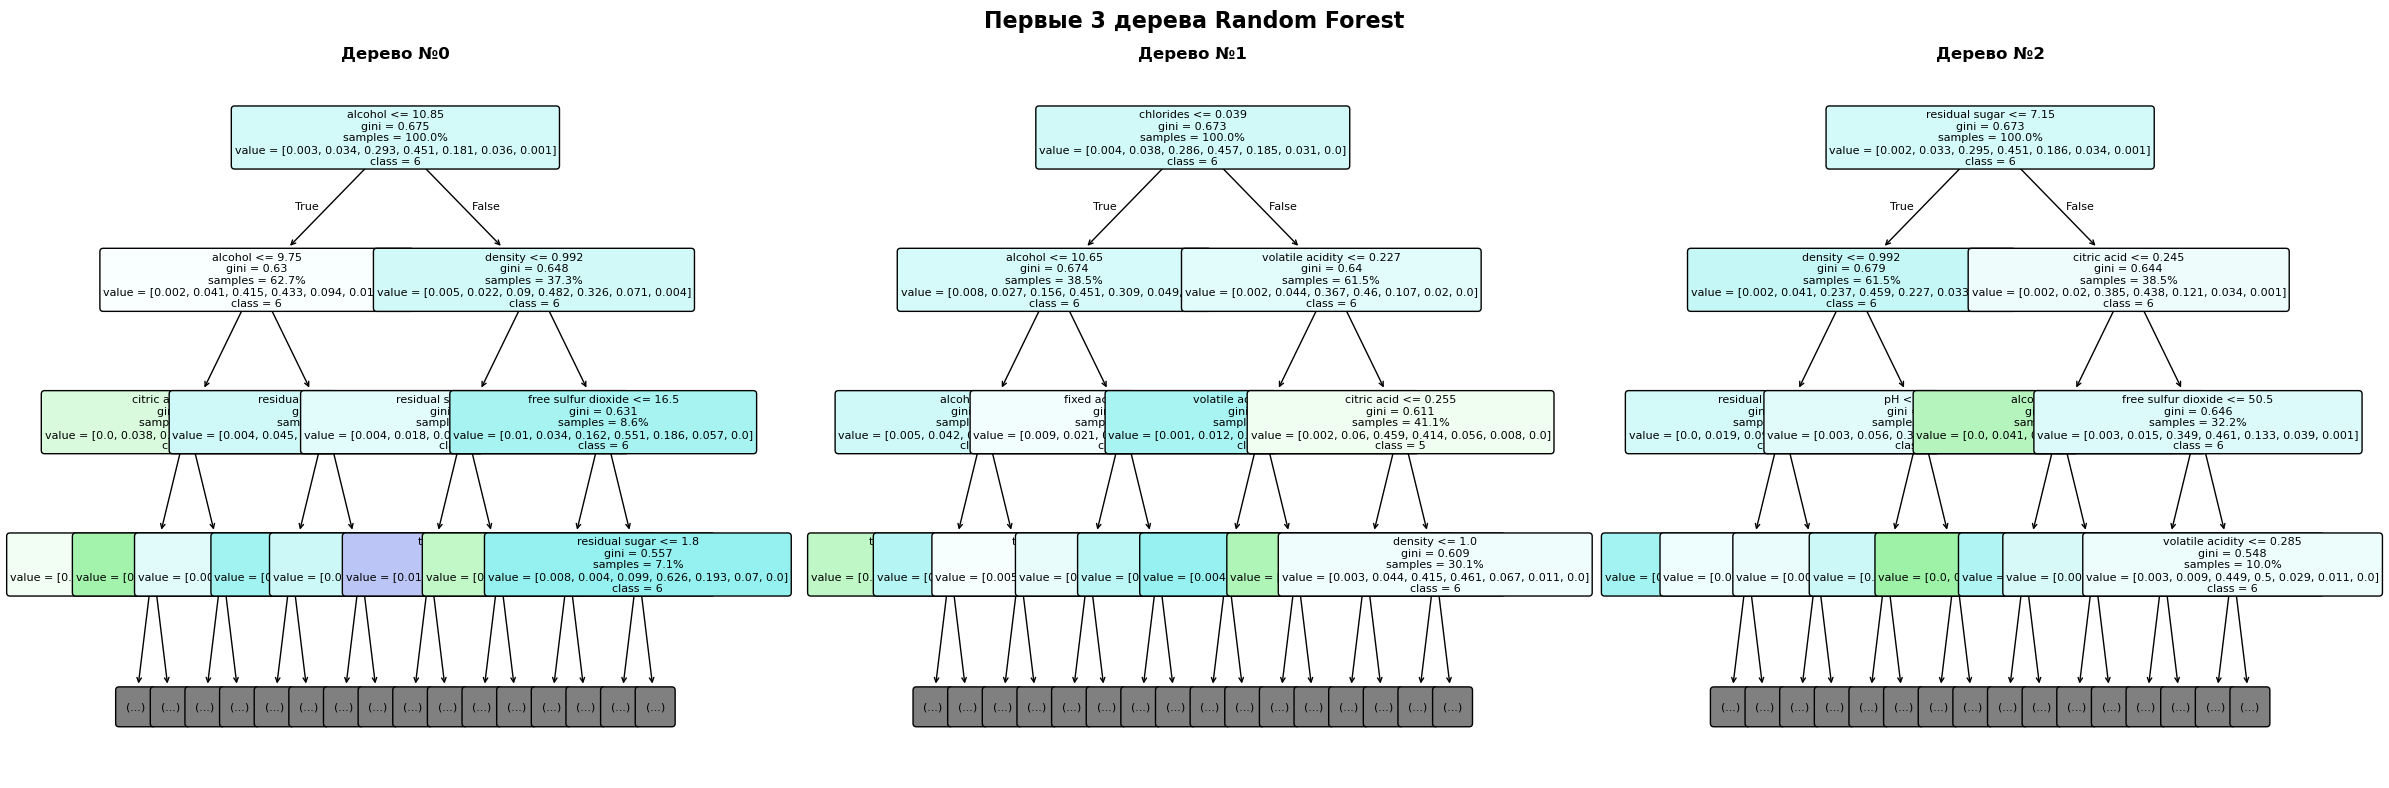

In [50]:
# Визуализация первых 3 деревьев Random Forest
fig, axes = plt.subplots(1, 3, figsize=(24, 8))
fig.suptitle('Первые 3 дерева Random Forest', fontsize=16, fontweight='bold')

for idx in range(3):
    ax = axes[idx]
    plot_tree(rf_model.estimators_[idx], 
              filled=True, 
              feature_names=X_train.columns,
              class_names=[str(x) for x in sorted(y_train.unique())],
              rounded=True,
              proportion=True,
              ax=ax,
              fontsize=8,
              max_depth=3)  # Ограничиваем глубину для читаемости
    ax.set_title(f'Дерево №{idx}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [51]:
# Пункт 4 для Random Forest: Построить зависимость качества решения 
# (на обучении и скользящем контроле) от числа деревьев

def evaluate_random_forest_by_trees(X_train, y_train, n_trees_range, cv, 
                                     max_depth=None, random_seed=52):
    """
    Оценивает качество Random Forest с разным количеством деревьев
    используя кросс-валидацию
    
    Args:
        X_train, y_train: признаки и метки обучающей выборки
        n_trees_range: диапазон количества деревьев (n_estimators) для экспериментов
        cv: объект кросс-валидации
        max_depth: максимальная глубина деревьев (None = без ограничений)
        random_seed: seed для воспроизводимости
    
    Returns:
        dict: результаты экспериментов
    """
    cv_accuracy_scores = []
    cv_balanced_scores = []
    cv_f1_scores = []
    train_accuracy_scores = []
    train_balanced_scores = []
    train_f1_scores = []
    
    for n_trees in n_trees_range:
        print(f"Тестируем количество деревьев: {n_trees}")
        
        # Создаем модель Random Forest с заданным количеством деревьев
        rf_model = RandomForestClassifier(
            n_estimators=n_trees,
            max_depth=max_depth,
            random_state=random_seed,
            n_jobs=-1  # Используем все доступные ядра
        )
        
        # Кросс-валидация
        cv_acc_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')
        cv_bal_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='balanced_accuracy')
        cv_f1_scores_list = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='f1_weighted')
        
        # Обучаем на полном обучающем датасете для оценки качества на обучении
        rf_model.fit(X_train, y_train)
        y_train_pred = rf_model.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_balanced_acc = balanced_accuracy_score(y_train, y_train_pred)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        
        # Сохраняем средние значения по фолдам
        cv_accuracy_scores.append(np.mean(cv_acc_scores))
        cv_balanced_scores.append(np.mean(cv_bal_scores))
        cv_f1_scores.append(np.mean(cv_f1_scores_list))
        train_accuracy_scores.append(train_acc)
        train_balanced_scores.append(train_balanced_acc)
        train_f1_scores.append(train_f1)
        
        print(f"  CV Acc: {np.mean(cv_acc_scores):.4f}±{np.std(cv_acc_scores):.4f}, Train Acc: {train_acc:.4f}")
    
    results = {
        'n_trees': n_trees_range,
        'cv_accuracy': cv_accuracy_scores,
        'cv_balanced_accuracy': cv_balanced_scores,
        'cv_f1': cv_f1_scores,
        'train_accuracy': train_accuracy_scores,
        'train_balanced_accuracy': train_balanced_scores,
        'train_f1': train_f1_scores
    }
    
    return results


In [52]:
# Определяем диапазон количества деревьев для Random Forest
rf_n_trees_range = [10, 25, 50, 100, 150, 200, 300, 500]

# Проводим эксперименты с кросс-валидацией
rf_results = evaluate_random_forest_by_trees(X_train, y_train, rf_n_trees_range, cv)


Тестируем количество деревьев: 10
  CV Acc: 0.5805±0.0056, Train Acc: 0.9863
Тестируем количество деревьев: 25
  CV Acc: 0.6074±0.0015, Train Acc: 0.9985
Тестируем количество деревьев: 50
  CV Acc: 0.6208±0.0045, Train Acc: 1.0000
Тестируем количество деревьев: 100
  CV Acc: 0.6301±0.0058, Train Acc: 1.0000
Тестируем количество деревьев: 150
  CV Acc: 0.6301±0.0071, Train Acc: 1.0000
Тестируем количество деревьев: 200
  CV Acc: 0.6275±0.0059, Train Acc: 1.0000
Тестируем количество деревьев: 300
  CV Acc: 0.6304±0.0067, Train Acc: 1.0000
Тестируем количество деревьев: 500
  CV Acc: 0.6327±0.0003, Train Acc: 1.0000


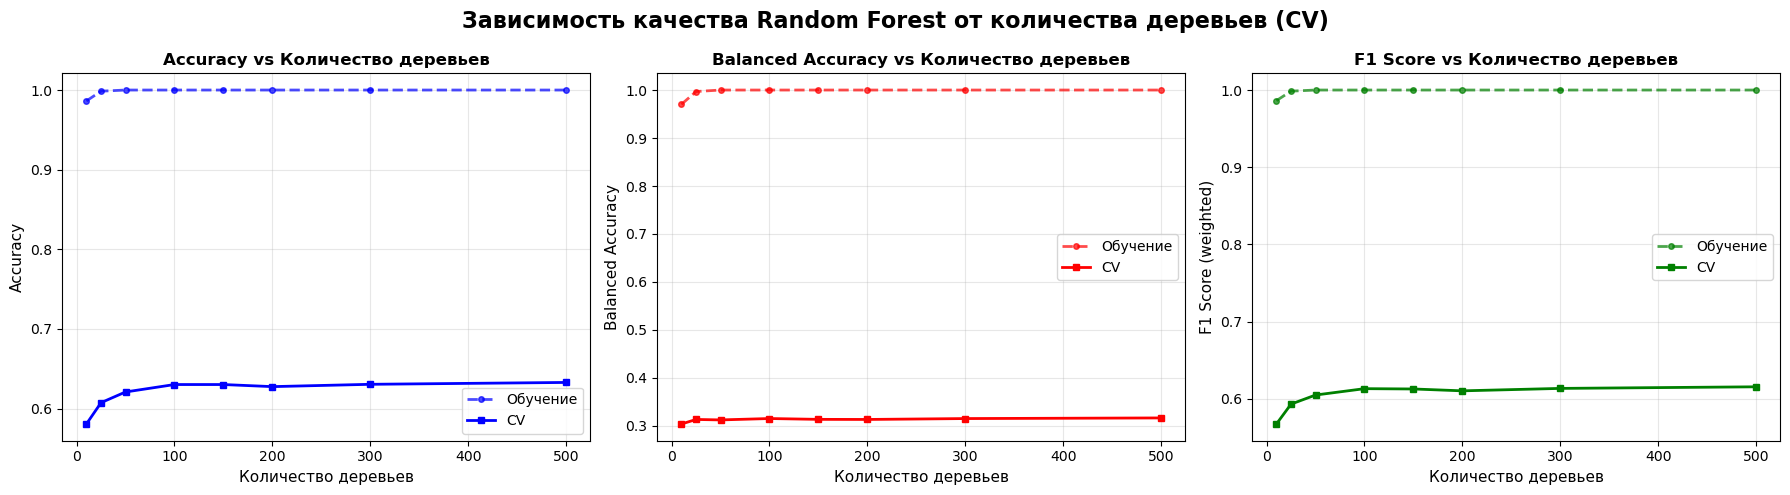

In [53]:
def plot_random_forest_results(results, n_trees_range):
    """
    Строит графики зависимости качества от количества деревьев в Random Forest
    с использованием кросс-валидации
    """
    # Создаем фигуру с 3 подграфиками в один ряд
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Зависимость качества Random Forest от количества деревьев (CV)', 
                 fontsize=16, fontweight='bold')
    
    # График 1: Accuracy
    ax1 = axes[0]
    ax1.plot(n_trees_range, results['train_accuracy'], 
            color='blue', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax1.plot(n_trees_range, results['cv_accuracy'], 
            color='blue', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax1.set_xlabel('Количество деревьев', fontsize=11)
    ax1.set_ylabel('Accuracy', fontsize=11)
    ax1.set_title('Accuracy vs Количество деревьев', fontsize=12, fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    
    # График 2: Balanced Accuracy
    ax2 = axes[1]
    ax2.plot(n_trees_range, results['train_balanced_accuracy'], 
            color='red', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax2.plot(n_trees_range, results['cv_balanced_accuracy'], 
            color='red', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax2.set_xlabel('Количество деревьев', fontsize=11)
    ax2.set_ylabel('Balanced Accuracy', fontsize=11)
    ax2.set_title('Balanced Accuracy vs Количество деревьев', fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    
    # График 3: F1 Score
    ax3 = axes[2]
    ax3.plot(n_trees_range, results['train_f1'], 
            color='green', linestyle='--', 
            label='Обучение', alpha=0.7, linewidth=2, marker='o', markersize=4)
    ax3.plot(n_trees_range, results['cv_f1'], 
            color='green', linestyle='-', 
            label='CV', alpha=1.0, linewidth=2, marker='s', markersize=4)
    
    ax3.set_xlabel('Количество деревьев', fontsize=11)
    ax3.set_ylabel('F1 Score (weighted)', fontsize=11)
    ax3.set_title('F1 Score vs Количество деревьев', fontsize=12, fontweight='bold')
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Строим графики
plot_random_forest_results(rf_results, rf_n_trees_range)


In [54]:
# обучим модель случайного леса на 200 деревьях и оценим на test

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=52,
    n_jobs=-1  # Используем все доступные ядра
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"balanced_accuracy: {balanced_accuracy_score(y_test, y_pred)}")

accuracy: 0.6918367346938775
balanced_accuracy: 0.38006390714054195


**Вывод:** Из графиков видно, что обучать более 300 деревьев нет смысла. Получаем сбалансированную точность и accuracy немного выше, чем у градиентного бустинга.